# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

#Import datetime to determine datetime
from datetime import datetime

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace (" ", "+")
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date,
                         })

     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | whitehorse
Processing Record 3 of Set 1 | nadym
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | alice springs
Processing Record 7 of Set 1 | fale old settlement
Processing Record 8 of Set 1 | papatowai
Processing Record 9 of Set 1 | molde
Processing Record 10 of Set 1 | yorkton
Processing Record 11 of Set 1 | mudon
Processing Record 12 of Set 1 | ismayilli
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | saipan
Processing Record 15 of Set 1 | alofi
Processing Record 16 of Set 1 | comodoro rivadavia
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | sydney mines
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | nagqu
Processing Record 21 of Set 1 | yarkovo
Processing Record 22 of Set 1 | ampanihy
Processing Record 23 of Set 1 

Processing Record 41 of Set 4 | lompoc
Processing Record 42 of Set 4 | sigli
Processing Record 43 of Set 4 | alaghsas
Processing Record 44 of Set 4 | vorgashor
Processing Record 45 of Set 4 | port douglas
Processing Record 46 of Set 4 | ghadamis
Processing Record 47 of Set 4 | saurimo
Processing Record 48 of Set 4 | tyukhtet
Processing Record 49 of Set 4 | al khawr
Processing Record 0 of Set 5 | cockburn town
Processing Record 1 of Set 5 | taiohae
City not found. Skipping...
Processing Record 2 of Set 5 | masterton
Processing Record 3 of Set 5 | coracora
Processing Record 4 of Set 5 | el calafate
Processing Record 5 of Set 5 | khandyga
Processing Record 6 of Set 5 | harstad
Processing Record 7 of Set 5 | checker hall
City not found. Skipping...
Processing Record 8 of Set 5 | rexburg
Processing Record 9 of Set 5 | sandnessjoen
Processing Record 10 of Set 5 | rongelap
Processing Record 11 of Set 5 | kenora
Processing Record 12 of Set 5 | keflavik
Processing Record 13 of Set 5 | coahuayan

Processing Record 31 of Set 8 | richards bay
Processing Record 32 of Set 8 | akcakoca
Processing Record 33 of Set 8 | oranjemund
Processing Record 34 of Set 8 | doembang nangbuat
Processing Record 35 of Set 8 | weatherford
Processing Record 36 of Set 8 | crane
Processing Record 37 of Set 8 | santo antonio da platina
Processing Record 38 of Set 8 | severo-yeniseyskiy
Processing Record 39 of Set 8 | saint-pierre
Processing Record 40 of Set 8 | launceston
Processing Record 41 of Set 8 | sinop
Processing Record 42 of Set 8 | isaka
Processing Record 43 of Set 8 | hauterive
Processing Record 44 of Set 8 | callao
Processing Record 45 of Set 8 | forrest city
Processing Record 46 of Set 8 | viligili
City not found. Skipping...
Processing Record 47 of Set 8 | birao
Processing Record 48 of Set 8 | cidreira
Processing Record 49 of Set 8 | petnjica
Processing Record 0 of Set 9 | luwuk
Processing Record 1 of Set 9 | turpan
Processing Record 2 of Set 9 | yigo village
Processing Record 3 of Set 9 | ka

Processing Record 18 of Set 12 | marataizes
Processing Record 19 of Set 12 | kerikeri
Processing Record 20 of Set 12 | gulu
Processing Record 21 of Set 12 | siqueira campos
Processing Record 22 of Set 12 | olyokminsk
Processing Record 23 of Set 12 | taoudenni
Processing Record 24 of Set 12 | zuni pueblo
Processing Record 25 of Set 12 | guerrero negro
Processing Record 26 of Set 12 | bayanhongor
Processing Record 27 of Set 12 | altai
Processing Record 28 of Set 12 | beira
Processing Record 29 of Set 12 | sambava
Processing Record 30 of Set 12 | tyazhinskiy
Processing Record 31 of Set 12 | greymouth
Processing Record 32 of Set 12 | pauini
Processing Record 33 of Set 12 | bongor
Processing Record 34 of Set 12 | gurghiu
Processing Record 35 of Set 12 | acapulco de juarez
Processing Record 36 of Set 12 | cill airne
Processing Record 37 of Set 12 | pathein
Processing Record 38 of Set 12 | sangueya
Processing Record 39 of Set 12 | udayagiri
Processing Record 40 of Set 12 | kirakira
Processing

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,84.16,85,72,8.01,EC,2023-06-14 22:36:56
1,whitehorse,60.7161,-135.0538,59.09,35,75,3.44,CA,2023-06-14 22:35:42
2,nadym,65.5333,72.5167,38.98,82,62,19.13,RU,2023-06-14 22:36:56
3,waitangi,-43.9535,-176.5597,52.83,93,76,7.00,NZ,2023-06-14 22:36:56
4,bethel,41.3712,-73.4140,68.76,79,75,6.91,US,2023-06-14 22:32:22


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("C:/Users/jwlem/OneDrive/Desktop/Jess/WeatherPy/output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/jwlem/OneDrive/Desktop/Jess/WeatherPy/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,84.16,85,72,8.01,EC,2023-06-14 22:36:56
1,whitehorse,60.7161,-135.0538,59.09,35,75,3.44,CA,2023-06-14 22:35:42
2,nadym,65.5333,72.5167,38.98,82,62,19.13,RU,2023-06-14 22:36:56
3,waitangi,-43.9535,-176.5597,52.83,93,76,7.00,NZ,2023-06-14 22:36:56
4,bethel,41.3712,-73.4140,68.76,79,75,6.91,US,2023-06-14 22:32:22


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

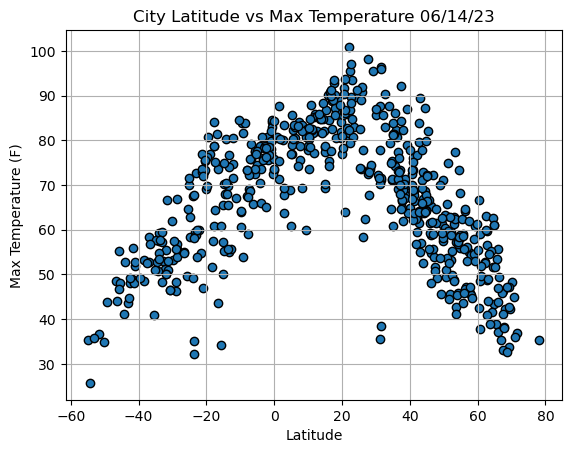

In [23]:
# Build scatter plot for latitude vs. temperature
# Build a scatter plot for each data type
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/jwlem/OneDrive/Desktop/Jess/WeatherPy/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

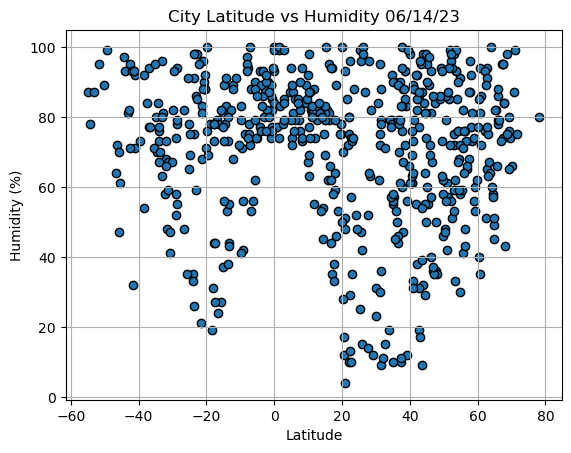

In [24]:
# Build scatter plot for latitude vs. Humidity
# Build a scatter plot for each data type
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/jwlem/OneDrive/Desktop/Jess/WeatherPy/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

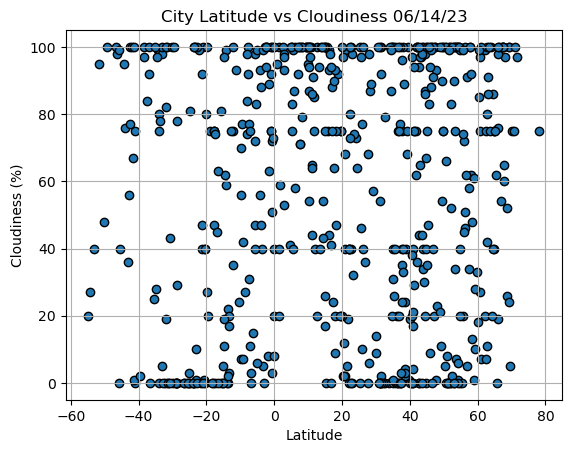

In [25]:
# Build scatter plot for latitude vs. Cloudiness
# Build a scatter plot for each data type
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/jwlem/OneDrive/Desktop/Jess/WeatherPy/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

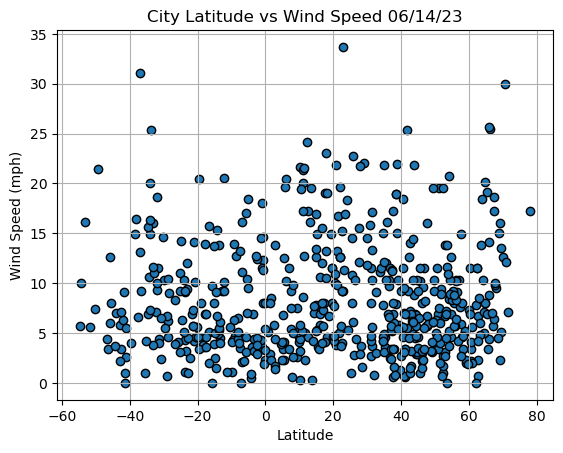

In [28]:
# Build scatter plot for latitude vs. Wind Speed
# Build a scatter plot for each data type
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("C:/Users/jwlem/OneDrive/Desktop/Jess/WeatherPy/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [51]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r-value is: ", r_value)
    plt.show()

In [52]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,whitehorse,60.7161,-135.0538,59.09,35,75,3.44,CA,2023-06-14 22:35:42
2,nadym,65.5333,72.5167,38.98,82,62,19.13,RU,2023-06-14 22:36:56
4,bethel,41.3712,-73.4140,68.76,79,75,6.91,US,2023-06-14 22:32:22
8,molde,62.7375,7.1591,59.70,94,11,2.30,NO,2023-06-14 22:36:57
9,yorkton,51.2167,-102.4677,75.04,57,0,19.57,CA,2023-06-14 22:36:57


In [53]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,84.16,85,72,8.01,EC,2023-06-14 22:36:56
3,waitangi,-43.9535,-176.5597,52.83,93,76,7.00,NZ,2023-06-14 22:36:56
5,alice springs,-23.7000,133.8833,35.15,75,0,1.14,AU,2023-06-14 22:35:27
6,fale old settlement,-9.3852,-171.2468,83.79,71,77,13.91,TK,2023-06-14 22:34:42
7,papatowai,-46.5619,169.4708,48.52,64,100,4.43,NZ,2023-06-14 22:36:57


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:  -0.7789225010374725


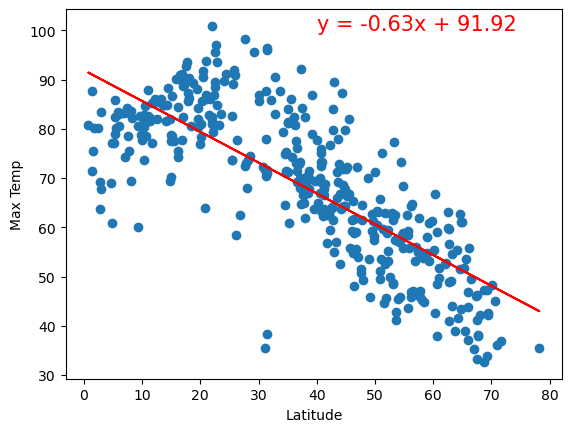

In [54]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, 'Max Temp', (40, 100))

The r-value is:  0.7856484451610427


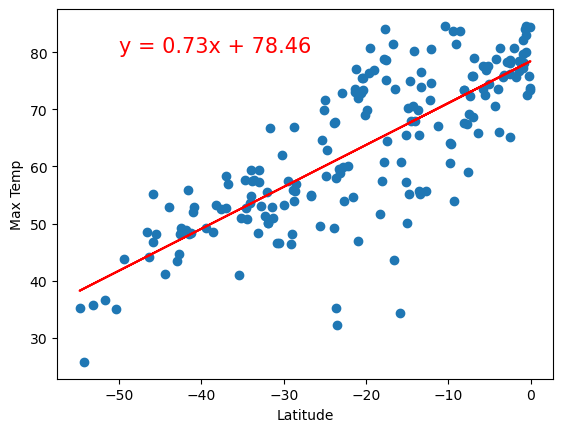

In [56]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, 'Max Temp', (-50, 80))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is:  -0.008325886225073504


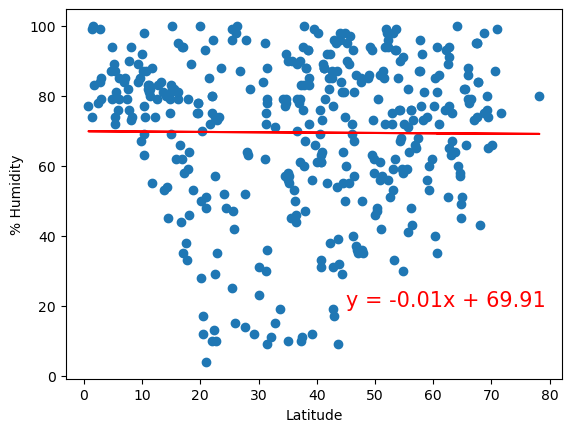

In [59]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, '% Humidity', (45, 20))

The r-value is:  0.06064294550207072


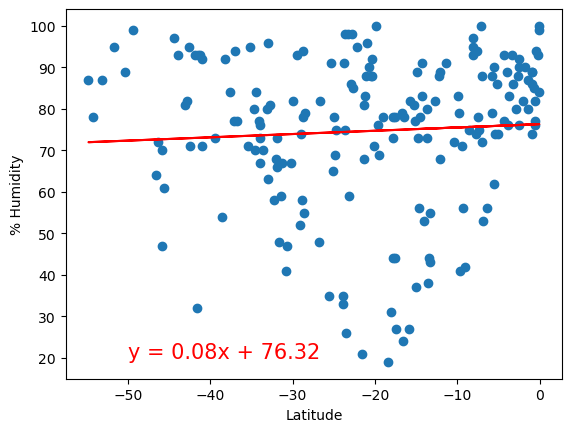

In [61]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, '% Humidity', (-50, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:  -0.08527074727625497


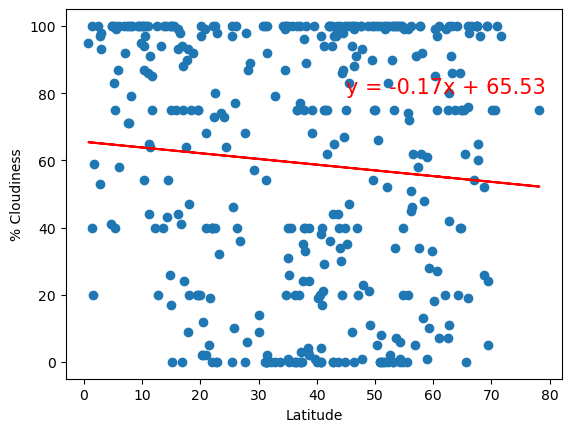

In [65]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, '% Cloudiness', (45, 80))

The r-value is:  0.003716449929531442


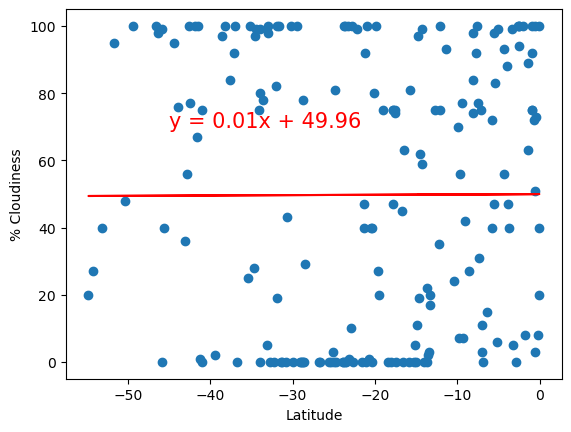

In [67]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, '% Cloudiness', (-45, 70))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:  -0.04057531482520953


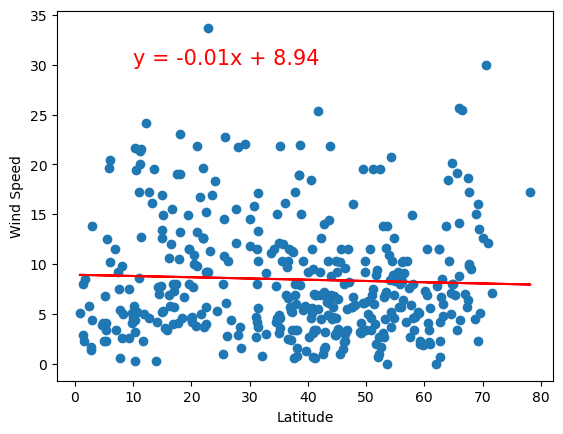

In [69]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, 'Wind Speed', (10, 30))

The r-value is:  -0.130422004836102


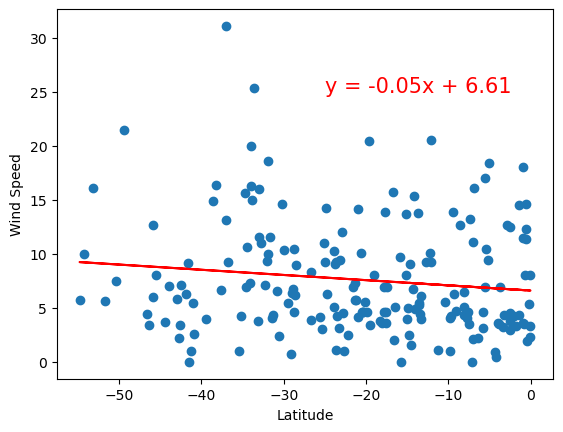

In [72]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, 'Wind Speed', (-25, 25))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#Northern and Southern Hemisphere: Temperature vs. Latitude
#The regression model is a good fit to show the correlation between Temperature
#and Latitude.These values are the closest to one of all the pairings which
#indicates these are the closest in general relationship for the formula of the line.


#Northern and Southern Hemisphere: Humidity, Cloudiness and Wind Speed vs. Latitude
#The regression models for humidity, Cloudiness or Wind Speed vs. latitude do not align well in image
#nor in the r value. It appears these factors by latitude are highly variable in both hemispheres.



